# Gesture Based Visually Writing System- Adding Virtual Animation, New Mode and New VUI

## Contents
* [Introduction](#Introduction)
    * [What now?](#What-now?)
* [Before Anything](#Before-Anything)
* [Credits](#Credits)
* [New Mode](#New-Mode)
    * [Concepts](#Concepts)
    * [Prepare Dropdown Icons](#Prepare-Dropdown-Icons)
    * [Attach colors image on VUI](#Attach-colors-image-on-VUI)
* [Adding Animation Effect](#Adding-Animation-Effect)
    * [Change Color](#Animation-Effect:-Change-Color)
    * [Scale](#Animation-Effect:-Scale)
* [Bonus Topic](#Bonus-Topic)
    * [Final Result](#Final-Result)
* [Finally](#Finally)
    * [Codes](#Codes)
    * [Features](#Features)
    * [Shortcomings](#Shortcomings)
* [What Next?](#What-Next?)

## Introduction
From last some weeks, i have been busy with some simple yet hard task of writing anything on canvas just by moving fingers (still is writable by moving anything) in front of the camera. Initially i got huge help to extract contours from [this article](https://gogul.dev/software/hand-gesture-recognition-p1). Then i was on my own to think something new and try to make it happen. Up to this point, a user can work with different modes and these modes are accessible by either keyboard or from the VUI region of the frame. But why to use keys when one can perform task using only waving fingers on the air?
* exit:- Exit from system.
* save:- Save current drawing(excluding pointer).
* move:- Idle mode(move only pointer).
* erase:- Erase mode.
* color:- Color mode.
* erase all:- Erase current canvas but leave the average image.
* restart:- Restart the average and canvas.

### What now?
* Now on this blog, i will try to add some new features. When a user moves pointer on canvas above the modes icon, i want to make it look like animated. It can happen just by scaling that icon image little bit.
* I will add new option to change color.

This blog will be divided on to 3 parts. Simple to harder.
* Introducing new Mode
* New VUI
* Virtual Animation on Icons


## Before Anything
Before anything, i recommend you to view previous 2 parts from the beginning to make it easier to understand here. 

* [Gesture Based Visually Writing System Using OpenCV and Python](https://acharyaramkrishna.com.np/2020/08/01/gesture-based-visually-writing-system-using-opencv-and-python/)
* [Gesture Based Visually Writing System: Adding Visual User Interface](https://acharyaramkrishna.com.np/2020/08/11/gesture-based-visually-writing-system-make-a-visual-user-interface/)

Also while begining this blog, i only had idea on the mind so there is not much chance of being this system best but i will try to make it work. I have not proceeded to do codes yet but will figure out the ways later.

## Credits
I want to give credits of this blogs to everyone on [LinkedIn](https://linkedin.com/in/ramkrishna-acharya-91a217183/) who reacted, shared and commented my previous blog and on twitter also (most of retweets was from bots lol). My journey on AI was inspired by [mr.Pujan Thapa](#), (i have met him only once but he doesn't knows the truth) so i want to give him huge credits.


## New Mode
New VUI is need for working with multi color. First i will make it work by keyboard. Then by contours. For simplicity, i will use 3 colors, Red, Green and Blue. So this new mode will be color mode. 

### Concepts
Again, it will be very helpful if someone finds a better way of doing this task on lesser computation but i am writing an idea. From the last system, i am going to use the variable `vui` which is stackked horizontally before showing it to user. Now on this `vui`, we only stackked top part of it but we rejected the bottom part i.e. ```python new_canvas = np.vstack([vui[:100], drawn_new]).astype(np.uint8) ```. But now, we will use the other parts also on the case when we have to choose the color from virtual dropdown menu. What i mean by virtual is, it will act like a dropdown but in real, it will be just an horizontally stackked arrays. 
* Take a final `vui` and when the mode is color, 
    * Find where our pointer lies
    * If pointer lies within the dropdown area then take the coordinate and the color related to the dropdown's that part.
    * Then change the current drawing color.

### Prepare Dropdown Icons
A code is given below. I prepared an icon for colors also using paint. Please follow the comments for better understanding.


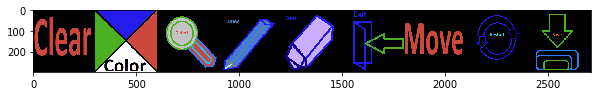

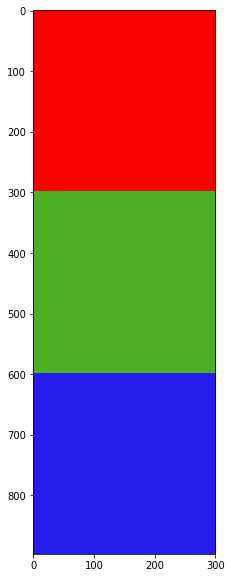

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def show(img, figsize=(10, 10)):
    figure = plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

# read icons
icon_dir = "icons/"
icons = []
for image_name in os.listdir(icon_dir):
    icon = cv2.imread(icon_dir+image_name)
    icons.append(icon)

icons = np.array(icons)
# stack it horizontally
icons_holder = np.hstack(icons)
show(icons_holder)

# read colors
color_dir = "colors/"
colors = []
for color_name in os.listdir(color_dir):
    color = cv2.imread(color_dir+color_name)
    colors.append(color)
colors = np.array(colors)
# stack it vertically
colors_holder = np.vstack(colors)
show(colors_holder)

### Attach colors image on VUI
I am using the Icons panel or VUI ROI above the Draw ROI. Also i have modified little bit of `run_system` method.
```python
def run_system(count_mode=5):
    #accumulate weight variable
    aweight = 0.5
    # strat the camera
    cam = cv2.VideoCapture(0)
    # ROI box
    top, right, bottom, left = 250, 400, 480, 681

    # ROI for GUI
    gtop, gright, gbottom, gleft = 150, 400, 240, 681
    gcolors = np.random.randint(0, 255, (9, 3), dtype=np.uint32).tolist()
    gb_indices = int((gleft-gright)/9)
    gb_indices = np.arange(gright, gleft, gb_indices)
    gb_indices[-1] = gb_indices[-1]+1
    # take each box's y coordinates
    # read icons
    icon_dir = "icons/"
    icons = []
    for image_name in os.listdir(icon_dir):
        icons.append(cv2.imread(icon_dir+image_name))
    icons = np.array(icons)

    gui_boxes = [(gb_indices[i], gb_indices[i+1]) for i in range(len(gb_indices)-1)]
    modes = os.listdir("icons/")
    modes = [mode.split(".")[0] for mode in modes]
    gui_modes_position = {modes[i]:gui_boxes[i] for i in range(len(gb_indices)-1)}
    gui_modes_icons = {modes[i]:icons[i] for i in range(len(gb_indices)-1)}
    #print(gui_modes_position)
    # read icons
    icon_dir = "icons/"
    icons = []
    for image_name in os.listdir(icon_dir):
        icon = cv2.imread(icon_dir+image_name)
        icons.append(icon)

    icons = np.array(icons)
    # stack it horizontally
    icons_holder = np.hstack(icons)
    show(icons_holder)

    # read colors
    color_dir = "colors/"
    colors = []
    for color_name in os.listdir(color_dir):
        color = cv2.imread(color_dir+color_name)
        colors.append(color)
    colors = np.array(colors)
    # stack it vertically
    colors_holder = np.vstack(colors)
    show(colors_holder)

    # count frame
    num_frames=0
    # writing canvas
    canvas = None
    # thickness
    t=3
    # draw color(ink color)
    draw_color = (0, 255, 0)
    # pointer color
    pointer_color = (255, 0, 0)
    # mode flag
    erase = False
    # flag to indicate take average
    take_average=True
    #bg image
    draw_bg=None
    gui_bg = None

    previous_mode = "move"
    running_mode = "move"
    drawn = None
    count_modes = 0
    vui_canvas = None
    current_color = (20, 100, 50)
    colors_array = np.array([(255, 0, 0), (0, 255, 0), (0, 0, 255)]).tolist()
    while True:
        ####################################
        ####################################
```


I am assuming boxes as modes icons region, and icon's index starts from 0. Just below the key checking codes below codes must be added.
```python
                    if chr(key) == "v" or running_mode == "color":
                        # add color region on VUI
                        # only use few portion of vui for dropdown
                        xs = vui.shape[0]-300
                        # what will be the length of each box on modes panel?
                        # since our colors mode lies on 1st box
                        ys = int(vshape[1]/len(icons)) * 2 - int(vshape[1]/len(icons))
                        # length of each box
                        c1 = int(vshape[1]/len(icons))
                        # col. num. of 1st box's end
                        c2 = c1 * 2
                        # for every row below the modes region up to xs, for only 1st box 
                        vui[100:100+xs, c1:c2] = cv2.resize(colors_holder, (ys, xs))
                        
                        # we don't want yet to draw so we will move cursor instead
                        erase = None
                        
                        # out of xs length on vui, how much region will a single color can hold?
                        cboxes = int(xs/len(colors))
                        
                        # take parts of rows from the draw ROI because our ROI for color lies on Draw ROI part. 
                        # if gshape[0] rows contains xs parts for colors then what must contain for bottom-top?
                        crb = int(xs/gshape[0] * (bottom-top))
                        
                        # divide that crb rows into num colors part
                        cboxes = np.linspace(0, crb, len(colors)+1).astype(np.int64)
                        # find each box's extreme columns on Draw ROI   
                        cboxes = [(cboxes[i], cboxes[i+1]) for i in range(len(cboxes)-1)]
                        
                        # in which box is pointer now?
                        # check the rows, on which rows among colors ROI is pointer now?
                        cpointer = [cbox for cbox in cboxes if (cbox[0] < m[1] <= cbox[1])]
                        
                        # check the rows
                        cdb = (left-right)/len(icons) # draw box, divide original col draw ROI into num icons pcs
                        if  len(cpointer) > 0 and cdb<=m[0]<=cdb*2: # since color lies on 2nd box check if pointer is on that col
                            current_color = colors_array[cboxes.index(cpointer[-1])]
                            
```

And finally, and the codes where `erase==None` was present, it must be slightly modified.
```python
                    elif erase == None:
                        canvas_shape = canvas.shape
                        clone_shape = clone.shape
                        eshape = (clone_shape[0]/canvas_shape[0], clone_shape[1]/canvas_shape[1])
                        m[0] = int(eshape[1]*m[0])
                        m[1] = int(eshape[0]*m[1])

                        if drawn is None:
                            e = cv2.erode(canvas, (3, 3), iterations=5)
                            drawn = cv2.resize(e, (clone.shape[1], clone.shape[0]))

                        drawn = cv2.resize(drawn, (clone.shape[1], clone.shape[0]))
                        dc = drawn.copy()  
                        cv2.circle(dc, (m[0], m[1]), 10, pointer_color, -3)
                        drawn_new = dc
                        new_canvas = np.vstack([vui[:100], drawn_new]).astype(np.uint8)
                        if running_mode == "color":
                            new_canvas[100:100+xs, c1:c2] = vui[100:100+xs, c1:c2]
                        cv2.imshow("Drawing", new_canvas)
```

#### What is happening?
* Initially, i prepared icons for colors and also prepared image for it.
* Then i added new variable `current_color`, which will be responsible for changing color.
* Then i added new variable to store RGB values for 3 colors.
* When pressing key `v` or going to the mode named `color`, we will change our running mode to `color`.
* When running mode is `color` then, show the `vui` image with dropdown like colors panel (look at `erase==None`)
* On running mode, we find the current position of pointer on ROI, then compare it with Drawing canvas. Because `vui` and drawing canvas are same sized.
    * We found the exact column where a colors icon is and where it can locate to ROIs.
    * Next we found where the each color's icon is and where it can locate to ROIs.
    * When the current pointer is on the dropdown ROIs, then we check on which color's region is the pointer.
    * Change `current_color` according to the pointer positon.

The final code must show the result like below.
<figure>
<video src = "Assets/dropdown.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Dropdown working</figcaption>
</figure> 

## Adding Animation Effect
The term animation will be nothing but a fake animation here. I have only one thing on mind to do as animation. I have never used Animation on OpenCV but used with Matplotlib many times. But here i have few ideas with performing animation like features.
* Resize the portion/box which holds the icon. It makes look like scaled.
* Rotate the portion/box which holds the icon. It makes look like spinning.
* Change the color.

Among these, easiest one is to chane the color. I will start with this one.

### Animation Effect: Change Color
One thing a clever man (performer or magician) always tries to take an attention of everyone by guessing what might surprise the audience. There is nothing like a magic but all is the since used to fool people. And here i will use the term Animation but everything i will be doing is change the color. Why does it looks like animating? Well lets see on the output. How to make a box/icon change its color when a pointer is above it? Lets write it on steps:-
* Since we have 9 icons, we will have 9 boxes on both the ROI and VUI. So divide the VUI's icon panel on 9 boxes. (note that we need 10 cuts to make 9 sticks from 1)
* We already have used the box from ROI to find the current mode. Now we need to find the index of current mode.
* Since current mode and boxes are indexed in same order, we can use index of current mode to get index of box on VUI.
* Using index of box, we will slice the VUI's icons panel to get exactly the portion of icon where pointer lies currently.
* Now is the time to change color. Just add some color. Adding is most suitable here because we have black background image.

#### Lets see it on code.
Only few parts of code has to be added.
```python
                    ############################################
                    ############################################
        
                    # check if the y axis lies on any of gui boxes
                    current_box = [box for box in gui_boxes if box[0] <= m[0] <= box[1]][0] 
                    current_mode = [mode for mode, pos in gui_modes_position.items() if current_box==pos][0]
                    
                    ####### Look from here ########
                    ## Change color on current box
                    ccolor = np.array([[10, 10, 50]]).astype(np.uint8)
                    if current_mode == previous_mode:
                        count_modes += 1
                        # change color everytime, i want to make it more red
                        ccolor = count_modes * np.array([[10, 10, 50]]).astype(np.uint8)
                    if count_modes > count_mode:
                        running_mode = current_mode
                    previous_mode = current_mode
                    
                    # to make animate like features, we will have to find part where cursor is on canvas
                    # index of current mode
                    mind = modes.index(current_mode)
                    # to make 9 boxes, we need 10 lines on left and right
                    vboxes = np.linspace(0, vui.shape[1], len(icons)+1).astype(np.int64)
                    vboxes = [(vboxes[i], vboxes[i+1]) for i in range(len(icons))]
                    vbox = vboxes[mind]
                    vui_canvas_anim = vui_canvas.copy()
                    # increase brightness? instead of original vui_canvas, use its copy to edit 
                    vui_canvas_anim[:, vbox[0]:vbox[1]] += ccolor
                    
                    if vui_canvas is not None:
                        gshape = gray.shape
                        dummy = np.zeros_like(clone)
                        dummy_copy = dummy.copy()
                        dummy[:100, :] += vui_canvas_anim 
                        ##### above here #########
                        cv2.circle(dummy_copy, (m[0], m[1]), 10, (250, 250, 150), -3)
                        d = dummy_copy[gtop:gbottom, gright:gleft]                                                
                        d = cv2.resize(d, (gshape[1], vshape[0]))                        
                        dummy_temp = dummy[:100, :]
                        dummy_temp[d!=[0, 0, 0]] = 100
                        dummy[:100, :] += dummy_temp
                        vui = dummy
                       
                    cv2.circle(clone, (m[0], m[1]), 10, pointer_color, -3)

```

The result must look like below.

<figure>
<video src = "Assets/anim_color.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Animation: Color</figcaption>
</figure> 

The color is changing rapidly, which is not helping that much so we can use less value of pixels to add.

### Animation Effect: Scale
Again, i am going to use simple technique to perform scale like feature.

```python
                    ## Change color on current box
                    ccolor = np.array([[5, 5, 8]]).astype(np.uint8)
                    sf = 0.3
                    if current_mode == previous_mode:
                        count_modes += 1
                        ccolor = count_modes * ccolor
                        sf  *= count_modes 
                    if count_modes > count_mode:
                        running_mode = current_mode
                        count_modes = 0
                    previous_mode = current_mode
                    
                    # to make animate like features, we will have to find part where cursor is on canvas
                    mind = modes.index(current_mode)
                    # to make 9 boxes, we need 10 llines on left and right
                    vboxes = np.linspace(0, vui.shape[1], len(icons)+1).astype(np.int64)
                    vboxes = [(vboxes[i], vboxes[i+1]) for i in range(len(icons))]
                    vbox = vboxes[mind]
                    vui_canvas_anim = vui_canvas.copy()
                    
                    ## Anim 2 scale##
                    ### Scale down to up and repeat
                    icon_box = vui_canvas_anim[:, vbox[0]:vbox[1]].copy()
                    zeros_icon = np.zeros_like(icon_box)
                    icshape = icon_box.shape
                    icon_box = cv2.resize(icon_box.astype(np.uint8), (int(icshape[1]*sf), int(icshape[0]*sf)))
                    # take only part of new icon that fits to its original part
                    
                    if sf > 1:
                        rd = int((icon_box.shape[0] - icshape[0])/2)
                        cd = int((icon_box.shape[1] - icshape[1])/2)
                        zeros_icon[:, :] = icon_box[rd:icshape[0]+rd, cd:icshape[1]+cd] 
                    else:
                        rd = int((icshape[0] - icon_box.shape[0])/2)
                        cd = int((icshape[1] - icon_box.shape[1])/2)
                        zeros_icon[rd:abs(icon_box.shape[0]-rd), cd:abs(icon_box.shape[1]-cd)] = icon_box[rd:abs(icon_box.shape[0]-rd), cd:abs(icon_box.shape[1]-cd)] 
                    
                    vui_canvas_anim[:, vbox[0]:vbox[1]] = zeros_icon
                    
                    ## ANim 1, change color##
                    # increase brightness?
                    vui_canvas_anim[:, vbox[0]:vbox[1]] += ccolor
```

Just after we changed the color property, we will perform our animation. What happened there?
* Take a part of box which where pointer was located.
* Make zeros array just like that box.
* Resize that part of box with some factor. 
* The scale factor is increased with modes counts. 
* When image is shrinked:
    * Find the row divide i.e rd and column divide. TO make our icon fit just like previous icon. i.e. center of original and shrinked is same.
* When image is enlarged:
    * i.e rd and column divide. TO make our icon fit just like previous icon. i.e. center of original and shrinked is same.

Now the result should look like below:-

<figure>
<video src = "Assets/anim_scale.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Animation: Scale</figcaption>
</figure> 

Currently, the scaling happens real fast. Tuning the values will make it smoother.

## Bonus Topic
For the bonus topic, i am willing to make little easier vui. I want this system to be able to run with dual hand but only move/draw is usable by left hand. Doing this way, i can do other things like choose color from right hand and move/draw mode by left. And the final code looks like below. Honestly, i can not even understand the codes below after a day because it is so messy. I hope i can make it more factored.



In [46]:
import imutils
import time
from dcr.recognition import *

def running_average(bg_img, image, aweight):
    if bg_img is None:
        bg_img = image.copy().astype("float")
    else:
        cv2.accumulateWeighted(image, bg_img, aweight)    
    return bg_img

def get_contours(bg_img, image, threshold=10):
    
    # abs diff betn img and bg
    diff = cv2.absdiff(bg_img.astype("uint8"), image)    
    _, th = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    (cnts, _) = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(cnts) == 0:
        return None
    else:
        max_cnt = max(cnts, key=cv2.contourArea)
        return th, max_cnt

def run_system(count_mode=5, avg_frames=100, hroi=[250, 400, 480, 681],
               groi=[150, 400, 240, 681], icon_dir="icons/", color_dir="colors/"
              ):
    #accumulate weight variable
    aweight = 0.5
    # strat the camera
    cam = cv2.VideoCapture(0)
    # ROI box
    top, right, bottom, left = hroi
    # move ROI
    mtop, mright, mbottom, mleft =  100, 10, 250, 160
    
    # ROI for GUI
    gtop, gright, gbottom, gleft = groi
    gcolors = np.random.randint(0, 255, (9, 3), dtype=np.uint32).tolist()
    gb_indices = int((gleft-gright)/9)
    gb_indices = np.arange(gright, gleft, gb_indices)
    gb_indices[-1] = gb_indices[-1]+1
    # take each box's y coordinates
    # read icons
    icon_dir = icon_dir
    icons = []
    for image_name in os.listdir(icon_dir):
        icons.append(cv2.imread(icon_dir+image_name))
    icons = np.array(icons)

    gui_boxes = [(gb_indices[i], gb_indices[i+1]) for i in range(len(gb_indices)-1)]
    modes = os.listdir(icon_dir)
    modes = [mode.split(".")[0] for mode in modes]
    gui_modes_position = {modes[i]:gui_boxes[i] for i in range(len(gb_indices)-1)}
    gui_modes_icons = {modes[i]:icons[i] for i in range(len(gb_indices)-1)}
    
    # stack it horizontally
    icons_holder = np.hstack(icons)
    #show(icons_holder)

    # read colors
    color_dir = "colors/"
    colors = []
    for color_name in os.listdir(color_dir):
        color = cv2.imread(color_dir+color_name)
        colors.append(color)
    colors = np.array(colors)
    # stack it vertically
    colors_holder = np.vstack(colors)
    #show(colors_holder)

    # count frame
    num_frames=0
    # writing canvas
    canvas = None
    # thickness
    t=3
    # draw color(ink color)
    draw_color = (0, 255, 0)
    # pointer color
    pointer_color = (255, 0, 0)
    # mode flag
    erase = False
    # flag to indicate take average
    take_average=True
    #bg image
    draw_bg=None
    gui_bg = None
    move_bg = None
    
    previous_mode = "move"
    running_mode = "move"
    drawn = None
    count_modes = 0
    vui_canvas = None
    current_color = (20, 100, 50)
    colors_array = np.array([(255, 0, 0), (0, 255, 0), (0, 0, 255)]).tolist()
    # loop while everything is true
    while True:
        # read the camera result
        (ret, frame) = cam.read()
        # if camera has read frame
        if ret:
            # wait for 1ms to key press
            key = cv2.waitKey(1) & 0xFF
            frame = imutils.resize(frame, width=700)
            # flip to remove mirror effect
            frame = cv2.flip(frame, 1)
            # clone it to not mess with real frame
            clone = frame.copy()
            gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)
            h, w = frame.shape[:2]
            # take roi, to send it onto contour/average extraction
            draw_roi = frame[top:bottom, right:left]
            # roi to grayscale
            #draw_gray = cv2.cvtColor(draw_roi, cv2.COLOR_BGR2GRAY)
            draw_gray = gray[top:bottom, right:left]
            # add GaussianBlur to eliminate some noise
            draw_gray = cv2.GaussianBlur(draw_gray, (7, 7), 0)


            gui_roi = frame[gtop:gbottom, gright:gleft]
            #gui_gray = cv2.cvtColor(gui_roi, cv2.COLOR_BGR2GRAY)
            gui_gray = gray[gtop:gbottom, gright:gleft]
            gui_gray = cv2.GaussianBlur(gui_gray, (7, 7), 0)
            
            move_gray = gray[mtop:mbottom, mright:mleft]
            
            if vui_canvas is None:
                gshape = gray.shape
                vui_canvas = cv2.resize(icons_holder, (gshape[1], 100)).astype(np.uint8)
                vshape = vui_canvas.shape
                vui = np.zeros_like(frame)
                vui[:100, :] = vui_canvas

            # if to take average and num frames on average taking is lesser than 
            if num_frames<avg_frames and take_average==True:
                # perform running average
                draw_bg = running_average(draw_bg, draw_gray, aweight)                
                gui_bg = running_average(gui_bg, gui_gray, aweight=aweight)
                move_bg = running_average(move_bg, move_gray, aweight=aweight)
                # put frame number on frame
                cv2.putText(clone, str(num_frames), (100, 100),
                                       cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 1)
                num_frames+=1
            # if not to take average
            else:
                num_frames=0                        
                # take our segmented hand
                gui_hand = get_contours(gui_bg, gui_gray)
                draw_hand = get_contours(draw_bg, draw_gray)
                move_hand = get_contours(move_bg, move_gray)
                take_average=False

                if gui_hand is not None:
                    # get the position of contours
                    gthresholded, gsegmented = gui_hand
                    cv2.drawContours(clone, [gsegmented+(gright,gtop)], -1, (0, 0, 255))   
                    original_gcontour = gsegmented + (gright, gtop)

                    tshape = gthresholded.shape
                    sshape = gsegmented.shape
                    new_segmented = original_gcontour.reshape(sshape[0], sshape[-1])
                    m = new_segmented.min(axis=0)
                    # check if the y axis lies on any of gui boxes
                    current_box = [box for box in gui_boxes if box[0] <= m[0] <= box[1]][0] 
                    current_mode = [mode for mode, pos in gui_modes_position.items() if current_box==pos][0]
                    
                    ## Change color on current box
                    ccolor = np.array([[5, 5, 8]]).astype(np.uint8)
                    sf = 0.2
                    if current_mode == previous_mode:
                        count_modes += 1
                        ccolor = count_modes * ccolor
                        sf  *= count_modes 
                    if count_modes > count_mode:
                        running_mode = current_mode
                        count_modes = 0
                    previous_mode = current_mode
                    
                    # to make animate like features, we will have to find part where cursor is on canvas
                    mind = modes.index(current_mode)
                    # to make 9 boxes, we need 10 llines on left and right
                    vboxes = np.linspace(0, vui.shape[1], len(icons)+1).astype(np.int64)
                    vboxes = [(vboxes[i], vboxes[i+1]) for i in range(len(icons))]
                    vbox = vboxes[mind]
                    vui_canvas_anim = vui_canvas.copy()
                    
                    ## ANim 1, change color##
                    # increase brightness?
                    vui_canvas_anim[:, vbox[0]:vbox[1]] += ccolor
                    
                    ## Anim 2 scale##
                    ### Scale down to up and repeat
                    icon_box = vui_canvas_anim[:, vbox[0]:vbox[1]].copy()
                    zeros_icon = np.zeros_like(icon_box)
                    icshape = icon_box.shape
                    icon_box = cv2.resize(icon_box.astype(np.uint8), (int(icshape[1]*sf), int(icshape[0]*sf)))
                    # take only part of new icon that fits to its original part
                    
                    
                    if sf > 1:
                        rd = int((icon_box.shape[0] - icshape[0])/2)
                        cd = int((icon_box.shape[1] - icshape[1])/2)
                        #print(icon_box.shape, icshape, rd, icon_box.shape[0]-rd, cd,icon_box.shape[1]-cd)
                        # edit here.....
                        zeros_icon[:, :] = icon_box[rd:icshape[0]+rd, cd:icshape[1]+cd] 
                    else:
                        rd = int((icshape[0] - icon_box.shape[0])/2)
                        cd = int((icshape[1] - icon_box.shape[1])/2)
                        
                        #print(icon_box.shape, icshape, rd, icon_box.shape[0]-rd, cd,icon_box.shape[1]-cd)
                        zeros_icon[rd:abs(icon_box.shape[0]-rd), cd:abs(icon_box.shape[1]-cd)] = icon_box[rd:abs(icon_box.shape[0]-rd), cd:abs(icon_box.shape[1]-cd)] 
                    
                    vui_canvas_anim[:, vbox[0]:vbox[1]] = zeros_icon
                    vui_canvas_anim[:, vbox[0]:vbox[1]] += ccolor
                    if vui_canvas is not None:
                        gshape = gray.shape
                        dummy = np.zeros_like(clone)
                        dummy_copy = dummy.copy()
                        dummy[:100, :] += vui_canvas_anim
                        cv2.circle(dummy_copy, (m[0], m[1]), 10, (250, 250, 150), -3)
                        d = dummy_copy[gtop:gbottom, gright:gleft]                                                
                        d = cv2.resize(d, (gshape[1], vshape[0]))                        
                        dummy_temp = dummy[:100, :]
                        dummy_temp[d!=[0, 0, 0]] = 100
                        dummy[:100, :] += dummy_temp
                        vui = dummy
                        
                    
                    cv2.circle(clone, (m[0], m[1]), 10, pointer_color, -3)
                
                if move_hand is not None:
                    mthresholded, msegmented = move_hand
                    sshape = msegmented.shape
                    new_segmented = msegmented.reshape(sshape[0], sshape[-1])
                    m = new_segmented.min(axis=0)
                    cv2.drawContours(clone, [msegmented+(mright,mtop)], -1, (0, 0, 255))   
                    if len(msegmented)>50:
                        if m[0]+mright > int((mright+mleft)/2):
                            running_mode = "draw"
                            vui[:100] = vui_canvas
                            vui[100:] = 0
                        else:
                            running_mode = "move"
                            vui[:100] = vui_canvas
                            vui[100:] = 0
                if draw_hand is not None:
                    dthresholded, dsegmented = draw_hand
                    cv2.drawContours(clone, [dsegmented+(right,top)], -1, (0, 0, 255))   

                    tshape = dthresholded.shape
                    sshape = dsegmented.shape
                    new_segmented = dsegmented.reshape(sshape[0], sshape[-1])
                    m = new_segmented.min(axis=0)

                    
                    # if pressed x, erase
                    if chr(key) == "x" or running_mode=="erase":
                        draw_color = (255, 255, 255)
                        pointer_color = (0, 0, 255)
                        erase = True
                    if chr(key) == "c" or running_mode=="draw":
                        draw_color = current_color
                        pointer_color = (255, 0, 0)
                        erase = False
                    #idle
                    if chr(key) == "z" or running_mode=="move":
                        erase = None
                        pointer_color = (0, 0, 0)                   
                    # restart system
                    if chr(key) == "r" or running_mode == "restart":
                        take_average=True
                        running_mode = "move"
                        canvas = None
                    if chr(key) == "e" or running_mode == "clear":
                        canvas = None
                        drawn = np.zeros(drawn.shape)+255
                        running_mode="move"
                    if chr(key) == "v" or running_mode == "color":
                        # add color region on VUI
                        # only use few portion of vui for dropdown
                        xs = vui.shape[0]-300
                        # what will be the length of each box on modes panel?
                        # since our colors mode lies on 1st box
                        ys = int(vshape[1]/len(icons)) * 2 - int(vshape[1]/len(icons))
                        # length of each box
                        c1 = int(vshape[1]/len(icons))
                        # col. num. of 1st box's end
                        c2 = c1 * 2
                        # for every row below the modes region up to xs, for only 1st box 
                        vui[100:100+xs, c1:c2] = cv2.resize(colors_holder, (ys, xs))
                        
                        # we don't want yet to draw so we will move cursor instead
                        erase = None
                        
                        # out of xs length on vui, how much region will a single color can hold?
                        cboxes = int(xs/len(colors))
                        
                        # take parts of rows from the draw ROI because our ROI for color lies on Draw ROI part. 
                        # if gshape[0] rows contains xs parts for colors then what must contain for bottom-top?
                        crb = int(xs/gshape[0] * (bottom-top))
                        
                        # divide that crb rows into num colors part
                        cboxes = np.linspace(0, crb, len(colors)+1).astype(np.int64)
                        # find each box's extreme columns on Draw ROI   
                        cboxes = [(cboxes[i], cboxes[i+1]) for i in range(len(cboxes)-1)]
                        #print(len(cboxes))
                        
                        # in which box is pointer now?
                        # check the rows, on which rows among colors ROI is pointer now?
                        cpointer = [cbox for cbox in cboxes if (cbox[0] < m[1] <= cbox[1])]
                        
                        # check the rows
                        cdb = (left-right)/len(icons) # draw box, divide original col draw ROI into num icons pcs
                        if  len(cpointer) > 0 and cdb<=m[0]<=cdb*2: # since color lies on 2nd box check if pointer is on that col
                            current_color = colors_array[cboxes.index(cpointer[-1])]
                            
                    if type(canvas) == type(None):
                        canvas = np.zeros((tshape[0], tshape[1], 3))+255
                    c = np.zeros(canvas.shape, dtype=np.uint8)
                    cv2.circle(c, (m[0], m[1]), 5, pointer_color, -3)
                    cv2.circle(clone, (right+m[0], top+m[1]), 5, pointer_color, -3)
                    #print(right+m[0], top+m[1])
                    if erase==True:
                        cv2.circle(canvas, (m[0], m[1]), 5, draw_color, -3)
                        erimg=cv2.circle(canvas.copy(), (m[0], m[1]), 5, (0, 0, 0), -3)            
                        cv2.circle(c, (m[0], m[1]), 5, (0, 0, 255), -3)
                        e = cv2.erode(erimg, (3, 3), iterations=5)
                        drawn = cv2.resize(e, (clone.shape[1], clone.shape[0]))
                        c = cv2.resize(c, (clone.shape[1], clone.shape[0]))
                        drawn_new = drawn+c
                        new_canvas = np.vstack([vui[:100], drawn_new]).astype(np.uint8)
                        cv2.imshow("Drawing", new_canvas)
                        #cv2.imshow("Drawing", drawn+c)
                        erimg=cv2.circle(canvas.copy(), (m[0], m[1]), 5, (255, 255, 255), -3)            
                        cv2.circle(c, (m[0], m[1]), 5, (0, 0, 255), -3)
                        e = cv2.erode(erimg, (3, 3), iterations=5)
                        drawn = cv2.resize(e, (clone.shape[1], clone.shape[0])) 
                        dc = drawn.astype(np.uint8)
                        #cv2.imshow("dc", drawn.astype(np.uint8))
                        #exception from here, xs not defined
                        try:
                            new_canvas[100:100+xs] += vui[100:100+xs]
                        except:
                            pass
                        #show(vui[100:100+xs])
                    elif erase==False:
                        cv2.circle(canvas, (m[0], m[1]), 5, draw_color, -3)
                        #print(mm)
                        e = cv2.erode(canvas, (3, 3), iterations=5)
                        drawn = cv2.resize(e, (clone.shape[1], clone.shape[0]))
                        c = cv2.resize(c, (clone.shape[1], clone.shape[0]))
                        drawn_new = drawn+c
                        new_canvas = np.vstack([vui[:100], drawn_new]).astype(np.uint8)
                        try:
                            new_canvas[100:100+xs] += vui[100:100+xs]
                        except:
                            pass
                        #show(vui[100:100+xs])
                        
                        cv2.imshow("Drawing", new_canvas)
                        dc = drawn.astype(np.uint8)
                        #cv2.imshow("D", drawn.astype(np.uint8))
                        #cv2.imshow("c", c)
                    elif erase == None:
                        canvas_shape = canvas.shape
                        clone_shape = clone.shape
                        eshape = (clone_shape[0]/canvas_shape[0], clone_shape[1]/canvas_shape[1])
                        m[0] = int(eshape[1]*m[0])
                        m[1] = int(eshape[0]*m[1])

                        if drawn is None:
                            e = cv2.erode(canvas, (3, 3), iterations=5)
                            drawn = cv2.resize(e, (clone.shape[1], clone.shape[0]))

                        drawn = cv2.resize(drawn, (clone.shape[1], clone.shape[0]))
                        dc = drawn.copy()  
                        cv2.circle(dc, (m[0], m[1]), 10, pointer_color, -3)
                        drawn_new = dc
                        new_canvas = np.vstack([vui[:100], drawn_new]).astype(np.uint8)
                        if running_mode == "color":
                            new_canvas[100:100+xs, c1:c2] = vui[100:100+xs, c1:c2]
                        #show(vui[100:100+xs])
                        
                        cv2.imshow("Drawing", new_canvas)
                        #cv2.imshow("Drawing", dc)

            if chr(key) == "s" or running_mode=="detect":
                if drawn is not None:
                    show(drawn)
                    d = drawn.copy().astype(np.uint8) 
                    r = recognition(cv2.cvtColor(d, cv2.COLOR_BGR2GRAY), 'show')
                    cv2.imshow("Detection", r)
                    running_mode="move"

            # draw a ROI for Draw
            cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(clone, str("GUI ROI"), (400, 140),
                                       cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
            cv2.putText(clone, f"Curr. Mode: {running_mode}", (400, 100),
                                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv2.putText(clone, str("Move"), (int((mright)/1), int((mtop+mbottom)/2)),
                                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv2.putText(clone, str("Draw"), (int((mleft + mright)/2), int((mtop+mbottom)/2)),
                                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv2.rectangle(clone, (mleft, mtop), (int((mleft + mright)/2), mbottom), (0, 255, 0), 2)
            cv2.rectangle(clone, (int((mleft + mright)/2), mtop), (mright, mbottom), (0, 255, 0), 2)
            
            # draw a ROI boxes for GUI
            for i in range(len(gb_indices)-1):
                _gleft = gb_indices[i]
                _gright = gb_indices[i+1]
                cv2.rectangle(clone, (_gleft, gtop), (_gright, gbottom), gcolors[i], 3)
                cv2.putText(clone, modes[i][:2], (_gleft+2, int((gtop+gbottom)/2)),
                                       cv2.FONT_HERSHEY_SIMPLEX, 0.75, gcolors[i], 2)
            # show live feed
            cv2.imshow("Feed", clone)
            if key == 32 or running_mode=="save":
                cv2.imwrite("Captured.png", dc)
                cv2.imshow("captured", dc)
                running_mode = "move"
            # if pressed  escape, loop out and stop processing
            if running_mode=="exit" or key==27:
                break
    cam.release()
    cv2.destroyAllWindows()
run_system(avg_frames=30)

To make it work from left and right side, i have added new ROI on left. 
* When there is more than 50 contour points detected then one of move/draw is chosen.
* We are dividing the box of move/draw on 2 equal parts, left part for moving cursor and right for draw mode.
* Then we re assigned `vui`, else the color dropdown will be visible whenever we draw.
* Also i have made few modifications inside each condition of `erase`, to save the drawn image.

The output of above code should look like below. <b> Note that i have disabled some modes to make it fast and easier to show demo. Because my room was having frequent light change due to rainy day and blackout.</b>

### Final Result
<figure>
<video src = "Assets/anim1_final.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Animation and New VUI</figcaption>
</figure> 

## Finally
I am going to point out features and shortcomings of this system now. 

### Codes
Codes to current version of the system is available on link below and if it is not, then hit the comment or leave me message (LinkedIn or Twitter or mail me).
* [Contour Based Writing](https://github.com/q-viper/Contour-Based-Writing/)

### Features
* Dual hand can be used to draw/move pointer.
* Color can be picked from dropdown like fashion.
* Total of 9 modes available.

### Shortcomings
Shortcomings are most helpful to find new feature on next version. Well here are plenty of them.
* Code is looking messy. Refactoring is needed and must be made modules.
* The idea to chose color is not always useful. Use the color array instead of color image. Or use color pallete for R, G, B and pick the color when pointer lies above it.
* The system is usable by contour of anything. Hence some gesture confirming model must be used.
* The background has to be taken many times to take average.

## What Next?
I will try to solve shortcomings on next time. But i am interested to make this system run on mobile phones to. As per now, i am thinking of taking frames from device camera and process it. Then use some API call to get those frame. I might use Unity. I am highly excited to try using LSTMs and other state of the art Deep Learning Algorithms to make this system more awesome but i don't have internet access (other than cellular data) to do broad research.

### Why not read more?
* [Deploying a RASA Chatbot on Android using Unity3d](https://acharyaramkrishna.com.np/2020/08/04/deploying-a-simple-rasa-chatbot-on-unity3d-project-to-make-a-chatbot-for-android-devices/)
* [Gesture Based Visually Writing System Using OpenCV and Python](https://acharyaramkrishna.com.np/2020/08/01/gesture-based-visually-writing-system-using-opencv-and-python/)
* [Logistic Regression from Scratch](https://acharyaramkrishna.com.np/2020/08/11/writing-a-logistic-regression-class-from-scratch/)
* [Linear Regression from Scratch](https://acharyaramkrishna.com.np/2020/08/07/writing-a-linear-regression-class-from-scratch-using-python/)
* [Writing Popular ML Optimizers from Scratch](https://acharyaramkrishna.com.np/2020/06/05/writing-popular-machine-learning-optimizers-from-scratch-on-python/)
* [Feed Forward Neural Network from Scratch](https://acharyaramkrishna.com.np/2020/05/31/writing-a-deep-neural-network-from-scratch-on-python/)
* [Convolutional Neural Networks from Scratch](https://acharyaramkrishna.com.np/2020/06/05/convolutional-neural-networks-from-scratch-on-python/)
* [Writing a Simple Image Processing Class from Scratch](https://acharyaramkrishna.com.np/2020/05/31/image-processing-class-from-scratch-on-python/)
* [Naive Bayes for text classifications: Scratch to Framework](https://acharyaramkrishna.com.np/2020/03/04/text-classification-using-naive-bayes-scratch-to-the-framework/)
* [Simple OCR for Devanagari Handwritten Text](https://acharyaramkrishna.com.np/2020/02/25/building-ocr-for-devanagari-handwritten-character/)